# **MATCH PREDICTION PROJECT** 
## *By : Zacky Faishal Abror*

# **Data Understanding**

## Persiapan Raw Data

Dilakukan persiapan data dengan load melakukan load data dari datasets yang telah dipersiapkan. Dataset di download dari web https://www.football-data.co.uk/englandm.php dengan mengambil data pertandingan liga inggris dari tahun 2020-2025

In [55]:
%pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Menggabungkan dataset menjadi 1 file dataset

Dataset yang di ambil dari sumber awalnya berjumlah 5 file csv, dengan detail: <br />
file 1 = data pertandingan tahun 2020-2021<br />
file 2 = data pertandingan tahun 2021-2022<br />
file 3 = data pertandingan tahun 2022-2023<br />
file 4 = data pertandingan tahun 2023-2024<br />
file 5 = data pertandingan tahun 2024-2025<br />

Sehingga perlu disatukan terlebih dahulu menjadi 1 file csv

In [2]:
# Daftar nama file
file_paths = [
    'datasets/E0 (1).csv',
    'datasets/E0 (2).csv',
    'datasets/E0 (3).csv',
    'datasets/E0 (4).csv',
    'datasets/E0 (5).csv'
]

# Membaca dan menggabungkan semua file
all_matches = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# Menyimpan ke file CSV baru
all_matches.to_csv('./datasets/all_matches.csv', index=False)

# Menampilkan 5 baris pertama untuk konfirmasi
all_matches.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,1XBCH,1XBCD,1XBCA,BFECH,BFECD,BFECA,BFEC>2.5,BFEC<2.5,BFECAHH,BFECAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleansing

Menghapus kolom yang tidak perlu

In [3]:
all_matches =pd.read_csv('./datasets/all_matches.csv')

In [4]:
# Hapus semua kolom yang mengandung kata kunci terkait odds
cols_to_drop = [col for col in all_matches.columns if any(keyword in col for keyword in ['B365', 'BW', 'IW', 'PS', 'WH', 'VC', 'Max', 'Avg', '>2.5', '<2.5', 'AH', 'CH', '1XB', 'BF'])]

# Hapus kolom tersebut dari dataframe
match_data = all_matches.drop(columns=cols_to_drop)

# Tampilkan kolom yang tersisa
match_data.head()


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,2,6,12,12,2,3,2,2,0,0
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,3,5,14,11,7,3,2,1,0,0
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,6,3,9,6,9,0,1,0,0,0
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,3,2,13,7,8,7,2,2,0,0
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1,7,12,9,2,5,1,1,0,0


#### ✅ Kolom yang Digunakan:

Berikut adalah kolom-kolom yang masih dipertahankan setelah proses penghapusan kolom odds:

- Informasi pertandingan:
  - `Div`: Divisi Liga
  - `Date`: Tanggal pertandingan
  - `Time`: Waktu pertandingan
  - `HomeTeam`: Tim tuan rumah
  - `AwayTeam`: Tim tamu

- Hasil pertandingan:
  - `FTHG`: Jumlah gol yang dicetak tim tuan rumah (Full Time)
  - `FTAG`: Jumlah gol yang dicetak tim tandang (Full Time)
  - `FTR`: Hasil pertandingan (H = Home win, D = Draw, A = Away win)
  - `HTHG`: Jumlah gol yang dicetak tim tuan rumah (Half Time)
  - `HTAG`: Jumlah gol yang dicetak tim tandang (Half Time)
  - `HTR`: Hasil babak pertama (H, D, A)

- Statistik pertandingan:
  - `Referee`: Wasit yang memimpin pertandingan
  - `HS`: Jumlah tembakan oleh tim tuan rumah
  - `AS`: Jumlah tembakan oleh tim tamu
  - `HST`: Tembakan tepat sasaran oleh tim tuan rumah
  - `AST`: Tembakan tepat sasaran oleh tim tamu
  - `HF`: Pelanggaran oleh tim tuan rumah
  - `AF`: Pelanggaran oleh tim tamu
  - `HC`: Sepak pojok oleh tim tuan rumah
  - `AC`: Sepak pojok oleh tim tamu
  - `HY`: Kartu kuning untuk tim tuan rumah
  - `AY`: Kartu kuning untuk tim tamu
  - `HR`: Kartu merah untuk tim tuan rumah
  - `AR`: Kartu merah untuk tim tamu

In [5]:
match_data.shape

(1900, 24)

In [6]:
match_data.dtypes

Div         object
Date        object
Time        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HTR         object
Referee     object
HS           int64
AS           int64
HST          int64
AST          int64
HF           int64
AF           int64
HC           int64
AC           int64
HY           int64
AY           int64
HR           int64
AR           int64
dtype: object

#### Menghapus/Mengatur Kolom Non-Numerik
Karena algoritma machine learning hanya menerima input numerik, maka kolom yang bertipe `object` (string) perlu diproses sebagai berikut:

##### ✅ Kolom `Date` dan `Time`
- Dikombinasikan menjadi satu kolom bertipe `datetime`
- Kemudian dipecah menjadi fitur waktu numerik:
  - `Year`, `Month`, `Day`, `Weekday`, `Hour`
- Kolom asli `Date`, `Time`, dan `Datetime` dihapus

##### ✅ Kolom `HomeTeam` dan `AwayTeam`
- Dilakukan **Label Encoding** dengan `LabelEncoder`
- Setiap nama tim diubah menjadi angka (misalnya: Arsenal = 0, Chelsea = 3, dst.)
- Encoder yang sama digunakan untuk kedua kolom agar konsisten

##### ✅ Kolom `FTR` (Full Time Result) dan `HTR` (Half Time Result)
- Diubah dari kategori `H`, `D`, `A` menjadi angka:
  - `H` (Home Win) → 0
  - `D` (Draw) → 1
  - `A` (Away Win) → 2
- `FTR` akan menjadi kolom **target** (label) dalam prediksi

##### ✅ Kolom `Referee`
- digunakan `label encoder` untuk melabeli wasit pertandingan

---

#### **Hasil Akhir**
Setelah semua langkah di atas:
- Semua kolom dalam dataset sekarang bertipe **numerik**
- Dataset siap digunakan untuk training model machine learning

In [7]:
# --- Ubah kolom Date + Time menjadi fitur numerik ---
match_data['Datetime'] = pd.to_datetime(match_data['Date'] + ' ' + match_data['Time'], errors='coerce')
match_data = match_data.dropna(subset=['Datetime'])  # Drop baris dengan NaT

# Ekstrak dan ubah tipe ke int
match_data['Year'] = match_data['Datetime'].dt.year.astype(int)
match_data['Month'] = match_data['Datetime'].dt.month.astype(int)
match_data['Day'] = match_data['Datetime'].dt.day.astype(int)
match_data['Weekday'] = match_data['Datetime'].dt.weekday.astype(int)
match_data['Hour'] = match_data['Datetime'].dt.hour.astype(int)

# Hapus kolom yang tidak diperlukan lagi
match_data.drop(columns=['Date', 'Time', 'Datetime'], inplace=True)

# --- Encode kolom tim: HomeTeam dan AwayTeam ---
team_encoder = LabelEncoder()
match_data['HomeTeam'] = team_encoder.fit_transform(match_data['HomeTeam'])
match_data['AwayTeam'] = team_encoder.transform(match_data['AwayTeam'])  # Gunakan encoder yang sama

# --- Encode hasil pertandingan (FTR dan HTR) ---
result_mapping = {'H': 0, 'D': 1, 'A': 2}
match_data['FTR'] = match_data['FTR'].map(result_mapping)
match_data['HTR'] = match_data['HTR'].map(result_mapping)

# --- Encode kolom Referee ---
# Simpan nilai asli
match_data['Referee_original'] = match_data['Referee']

# Lakukan encoding dan simpan encoder
ref_encoder = LabelEncoder()
match_data['Referee'] = ref_encoder.fit_transform(match_data['Referee'])

# --- Cek tipe data akhir ---
print(match_data.dtypes)

Div                 object
HomeTeam             int64
AwayTeam             int64
FTHG                 int64
FTAG                 int64
FTR                  int64
HTHG                 int64
HTAG                 int64
HTR                  int64
Referee              int64
HS                   int64
AS                   int64
HST                  int64
AST                  int64
HF                   int64
AF                   int64
HC                   int64
AC                   int64
HY                   int64
AY                   int64
HR                   int64
AR                   int64
Year                 int64
Month                int64
Day                  int64
Weekday              int64
Hour                 int64
Referee_original    object
dtype: object


In [8]:
# Tampilkan hasil perubahan
match_data.head()

,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HY,AY,HR,AR,Year,Month,Day,Weekday,Hour,Referee_original
0,E0,9,0,0,3,2,0,1,2,3,...,2,2,0,0,2020,12,9,2,12,C Kavanagh
1,E0,7,21,1,0,0,1,0,0,13,...,2,1,0,0,2020,12,9,2,15,J Moss
2,E0,13,11,4,3,0,3,2,0,21,...,1,0,0,0,2020,12,9,2,17,M Oliver
3,E0,25,17,0,2,2,0,0,1,29,...,2,2,0,0,2020,12,9,2,20,S Attwell
28,E0,6,7,4,0,0,0,0,1,21,...,2,0,0,0,2020,3,10,1,12,M Oliver


## Exploratory Data Analysis (EDA)

Setelah proses data loading dan data cleansing, langkah selanjutnya dalam pipeline machine learning adalah melakukan **Exploratory Data Analysis (EDA)**. EDA bertujuan untuk memahami struktur, karakteristik, dan hubungan antar variabel dalam dataset yang akan digunakan.

---

### Tahapan Exploratory Data Analysis (EDA)
EDA membantu dalam pemilihan fitur dan validasi kualitas data sebelum masuk tahap modeling.


#### 1. Pemeriksaan Awal
- Menampilkan struktur data (`info`, `describe`)
- Melihat distribusi tipe data dan nilai unik

In [9]:
print("Dataset Information:")
print(match_data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 732 entries, 0 to 1879
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Div               732 non-null    object
 1   HomeTeam          732 non-null    int64 
 2   AwayTeam          732 non-null    int64 
 3   FTHG              732 non-null    int64 
 4   FTAG              732 non-null    int64 
 5   FTR               732 non-null    int64 
 6   HTHG              732 non-null    int64 
 7   HTAG              732 non-null    int64 
 8   HTR               732 non-null    int64 
 9   Referee           732 non-null    int64 
 10  HS                732 non-null    int64 
 11  AS                732 non-null    int64 
 12  HST               732 non-null    int64 
 13  AST               732 non-null    int64 
 14  HF                732 non-null    int64 
 15  AF                732 non-null    int64 
 16  HC                732 non-null    int64 
 17 

In [10]:
# Statistik deskriptif untuk kolom numerik
match_data.describe()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AC,HY,AY,HR,AR,Year,Month,Day,Weekday,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,...,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,12.443989,11.900273,1.639344,1.327869,0.846995,0.758197,0.603825,0.889344,15.472678,13.721311,...,4.743169,1.678962,1.909836,0.057377,0.054645,2022.620219,6.016393,6.270492,2.954918,16.132514
std,7.948595,7.936971,1.367388,1.227429,0.874368,0.837069,0.807886,0.777626,11.069143,5.774981,...,2.734918,1.252934,1.321220,0.244194,0.244821,1.425976,3.542550,3.853054,1.972281,2.456780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,1.000000,0.000000,12.000000
25%,6.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,9.000000,...,3.000000,1.000000,1.000000,0.000000,0.000000,2021.000000,3.000000,3.000000,1.000000,15.000000
50%,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,15.000000,13.000000,...,4.000000,2.000000,2.000000,0.000000,0.000000,2023.000000,6.000000,5.000000,3.000000,15.000000
75%,19.000000,18.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,24.000000,17.000000,...,6.000000,2.000000,3.000000,0.000000,0.000000,2024.000000,9.000000,10.000000,5.000000,19.000000
max,26.000000,26.000000,9.000000,6.000000,2.000000,4.000000,5.000000,2.000000,35.000000,34.000000,...,16.000000,6.000000,8.000000,2.000000,2.000000,2025.000000,12.000000,12.000000,6.000000,20.000000


In [11]:
# Melihat distribusi kategori pada kolom hasil pertandingan (FTR)
match_data['FTR'].value_counts()

FTR
0    344
2    232
1    156
Name: count, dtype: int64

##### INSIGHT

Berikut adalah beberapa insight penting yang diperoleh dari analisis statistik deskriptif dataset:

###### 📊 1. Jumlah Data
- Dataset terdiri dari **732 pertandingan** dari musim 2020 hingga 2025.
  
###### 🏟️ 2. Tim Tuan Rumah dan Tandang
- Kolom `HomeTeam` dan `AwayTeam` berisi angka yang mewakili tim (sudah dikodekan dengan LabelEncoder).
- Terdapat sekitar **27 tim unik** yang tercatat, kemungkinan karena promosi dan degradasi dalam liga.

###### ⚽ 3. Statistik Gol
- Rata-rata gol tim tuan rumah (`FTHG`) adalah **1.64**, dan tim tandang (`FTAG`) adalah **1.33**.
- Ini menunjukkan bahwa **tuan rumah memiliki keunggulan gol rata-rata** dibanding tim tandang.

###### 🟰 4. Hasil Pertandingan (FTR)
- Kolom `FTR` sudah dikonversi menjadi nilai numerik (kemungkinan: 0 = Home Win, 1 = Draw, 2 = Away Win).
- Rata-rata hasil pertandingan (`mean = 0.85`) menunjukkan pertandingan cenderung **imbang atau sedikit lebih sering dimenangkan oleh tuan rumah**.

###### ⏱️ 5. Waktu Pertandingan
- Kolom `Hour` memiliki rata-rata **16.13**, yang berarti sebagian besar pertandingan berlangsung pada pukul 4 sore.
- Kolom `Weekday` menunjukkan pertandingan tersebar sepanjang minggu, dengan rata-rata mendekati **Rabu (2)**.

###### 🟨 6. Kartu dan Pelanggaran
- Rata-rata kartu kuning tim tandang (`AY`) adalah **1.91**, lebih tinggi dari tim tuan rumah (`HY`) sebesar **1.68**.
- Hal ini menunjukkan bahwa **tim tandang cenderung mendapatkan lebih banyak kartu kuning**.

###### 👨‍⚖️ 7. Wasit
- Kolom `Referee` sudah dalam bentuk numerik (hasil encoding), menunjukkan ada sekitar **36 wasit unik** yang memimpin pertandingan.

###### Analisis Distribusi Hasil Pertandingan (FTR)
- Tim tuan rumah memiliki **keunggulan dalam kemenangan** dibanding tim tandang.
- Jumlah hasil seri relatif lebih sedikit.


###### 💡 Kesimpulan Awal
- Tidak ada **missing values** yang terdeteksi pada tahap awal (`count` selalu 732).
- Ditemukan nilai gol ekstrim seperti `FTHG = 9` dan `FTAG = 6` yang bisa ditandai sebagai **outliers** untuk dianalisis lebih lanjut.

#### 2. Missing Value
- Mengecek nilai kosong dengan `.isna().sum()`
- Menentukan apakah akan dihapus atau diimputasi

In [12]:
# Mengecek jumlah missing value pada setiap kolom
missing_values = match_data.isna().sum()
print(missing_values)

Div                 0
HomeTeam            0
AwayTeam            0
FTHG                0
FTAG                0
FTR                 0
HTHG                0
HTAG                0
HTR                 0
Referee             0
HS                  0
AS                  0
HST                 0
AST                 0
HF                  0
AF                  0
HC                  0
AC                  0
HY                  0
AY                  0
HR                  0
AR                  0
Year                0
Month               0
Day                 0
Weekday             0
Hour                0
Referee_original    0
dtype: int64


Data sudah tidak ada yang kosong

#### 3. Outliers
- Deteksi nilai ekstrem menggunakan boxplot atau metode IQR
- Menentukan apakah perlu ditangani atau tidak

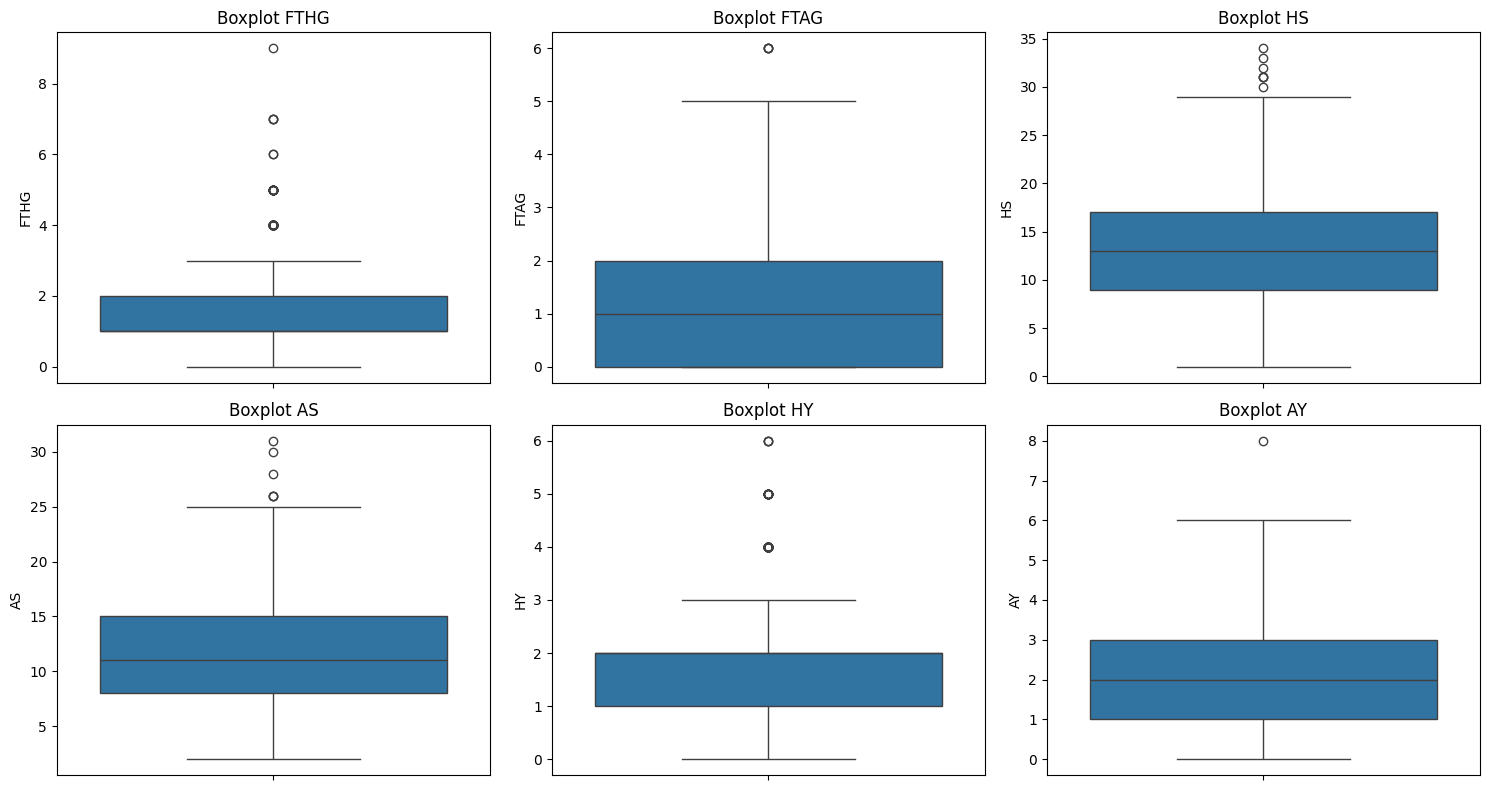

Jumlah outlier pada FTHG: 70
      FTHG
2        4
28       4
29       4
37       7
71       4
...    ...
1749     7
1751     4
1757     5
1829     5
1865     4

[70 rows x 1 columns]


In [13]:
# Pilih kolom numerik yang relevan untuk dicek outlier-nya
cols_to_check = ['FTHG', 'FTAG', 'HS', 'AS', 'HY', 'AY']

# Visualisasi boxplot untuk setiap kolom
plt.figure(figsize=(15, 8))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=match_data[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# Deteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Contoh deteksi outlier untuk kolom 'FTHG'
outliers_fthg = detect_outliers_iqr(match_data, 'FTHG')
print(f"Jumlah outlier pada FTHG: {len(outliers_fthg)}")
print(outliers_fthg[['FTHG']])

##### **INSIGHT**

Pada tahap ini, dilakukan deteksi nilai ekstrem (outliers) menggunakan visualisasi boxplot dan metode Interquartile Range (IQR). Beberapa insight dari boxplot:

- **FTHG (Full Time Home Goals)** dan **FTAG (Full Time Away Goals)** memiliki outlier, terutama saat jumlah gol lebih dari 4 untuk FTHG dan lebih dari 5 untuk FTAG.
- **HS (Home Shots)** dan **AS (Away Shots)** juga memiliki sejumlah outlier. Terdapat pertandingan dengan jumlah tembakan sangat tinggi (di atas 30).
- **HY (Home Yellow Cards)** dan **AY (Away Yellow Cards)** menunjukkan nilai yang melebihi 4 atau 5, tergolong sebagai outlier jika dibandingkan dengan distribusi normal kartu kuning.

Meskipun ada outliers, data seperti ini masih tergolong wajar untuk data pertandingan sepak bola karena:
- Bisa jadi memang ada pertandingan yang memiliki nilai tersebut
- Tidak semua outlier merupakan kesalahan; bisa jadi itu adalah *extreme but valid values*.

> Untuk saat ini, tidak dilakukan penghapusan terhadap outlier karena nilainya masih memiliki arti kontekstual dalam pertandingan sepak bola dan bisa memberikan informasi penting saat modeling nanti.


#### 4. Univariate Analysis
- Menganalisis distribusi masing-masing fitur secara individual
- Visualisasi: histogram, boxplot, countplot

C:\Users\faish\AppData\Local\Temp\ipykernel_14000\791800272.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=decoded_df, x=col, order=decoded_df[col].value_counts().index, palette="Set3")
C:\Users\faish\AppData\Local\Temp\ipykernel_14000\791800272.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=decoded_df, x=col, order=decoded_df[col].value_counts().index, palette="Set3")
C:\Users\faish\AppData\Local\Temp\ipykernel_14000\791800272.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=decoded_df, x=col, order=deco

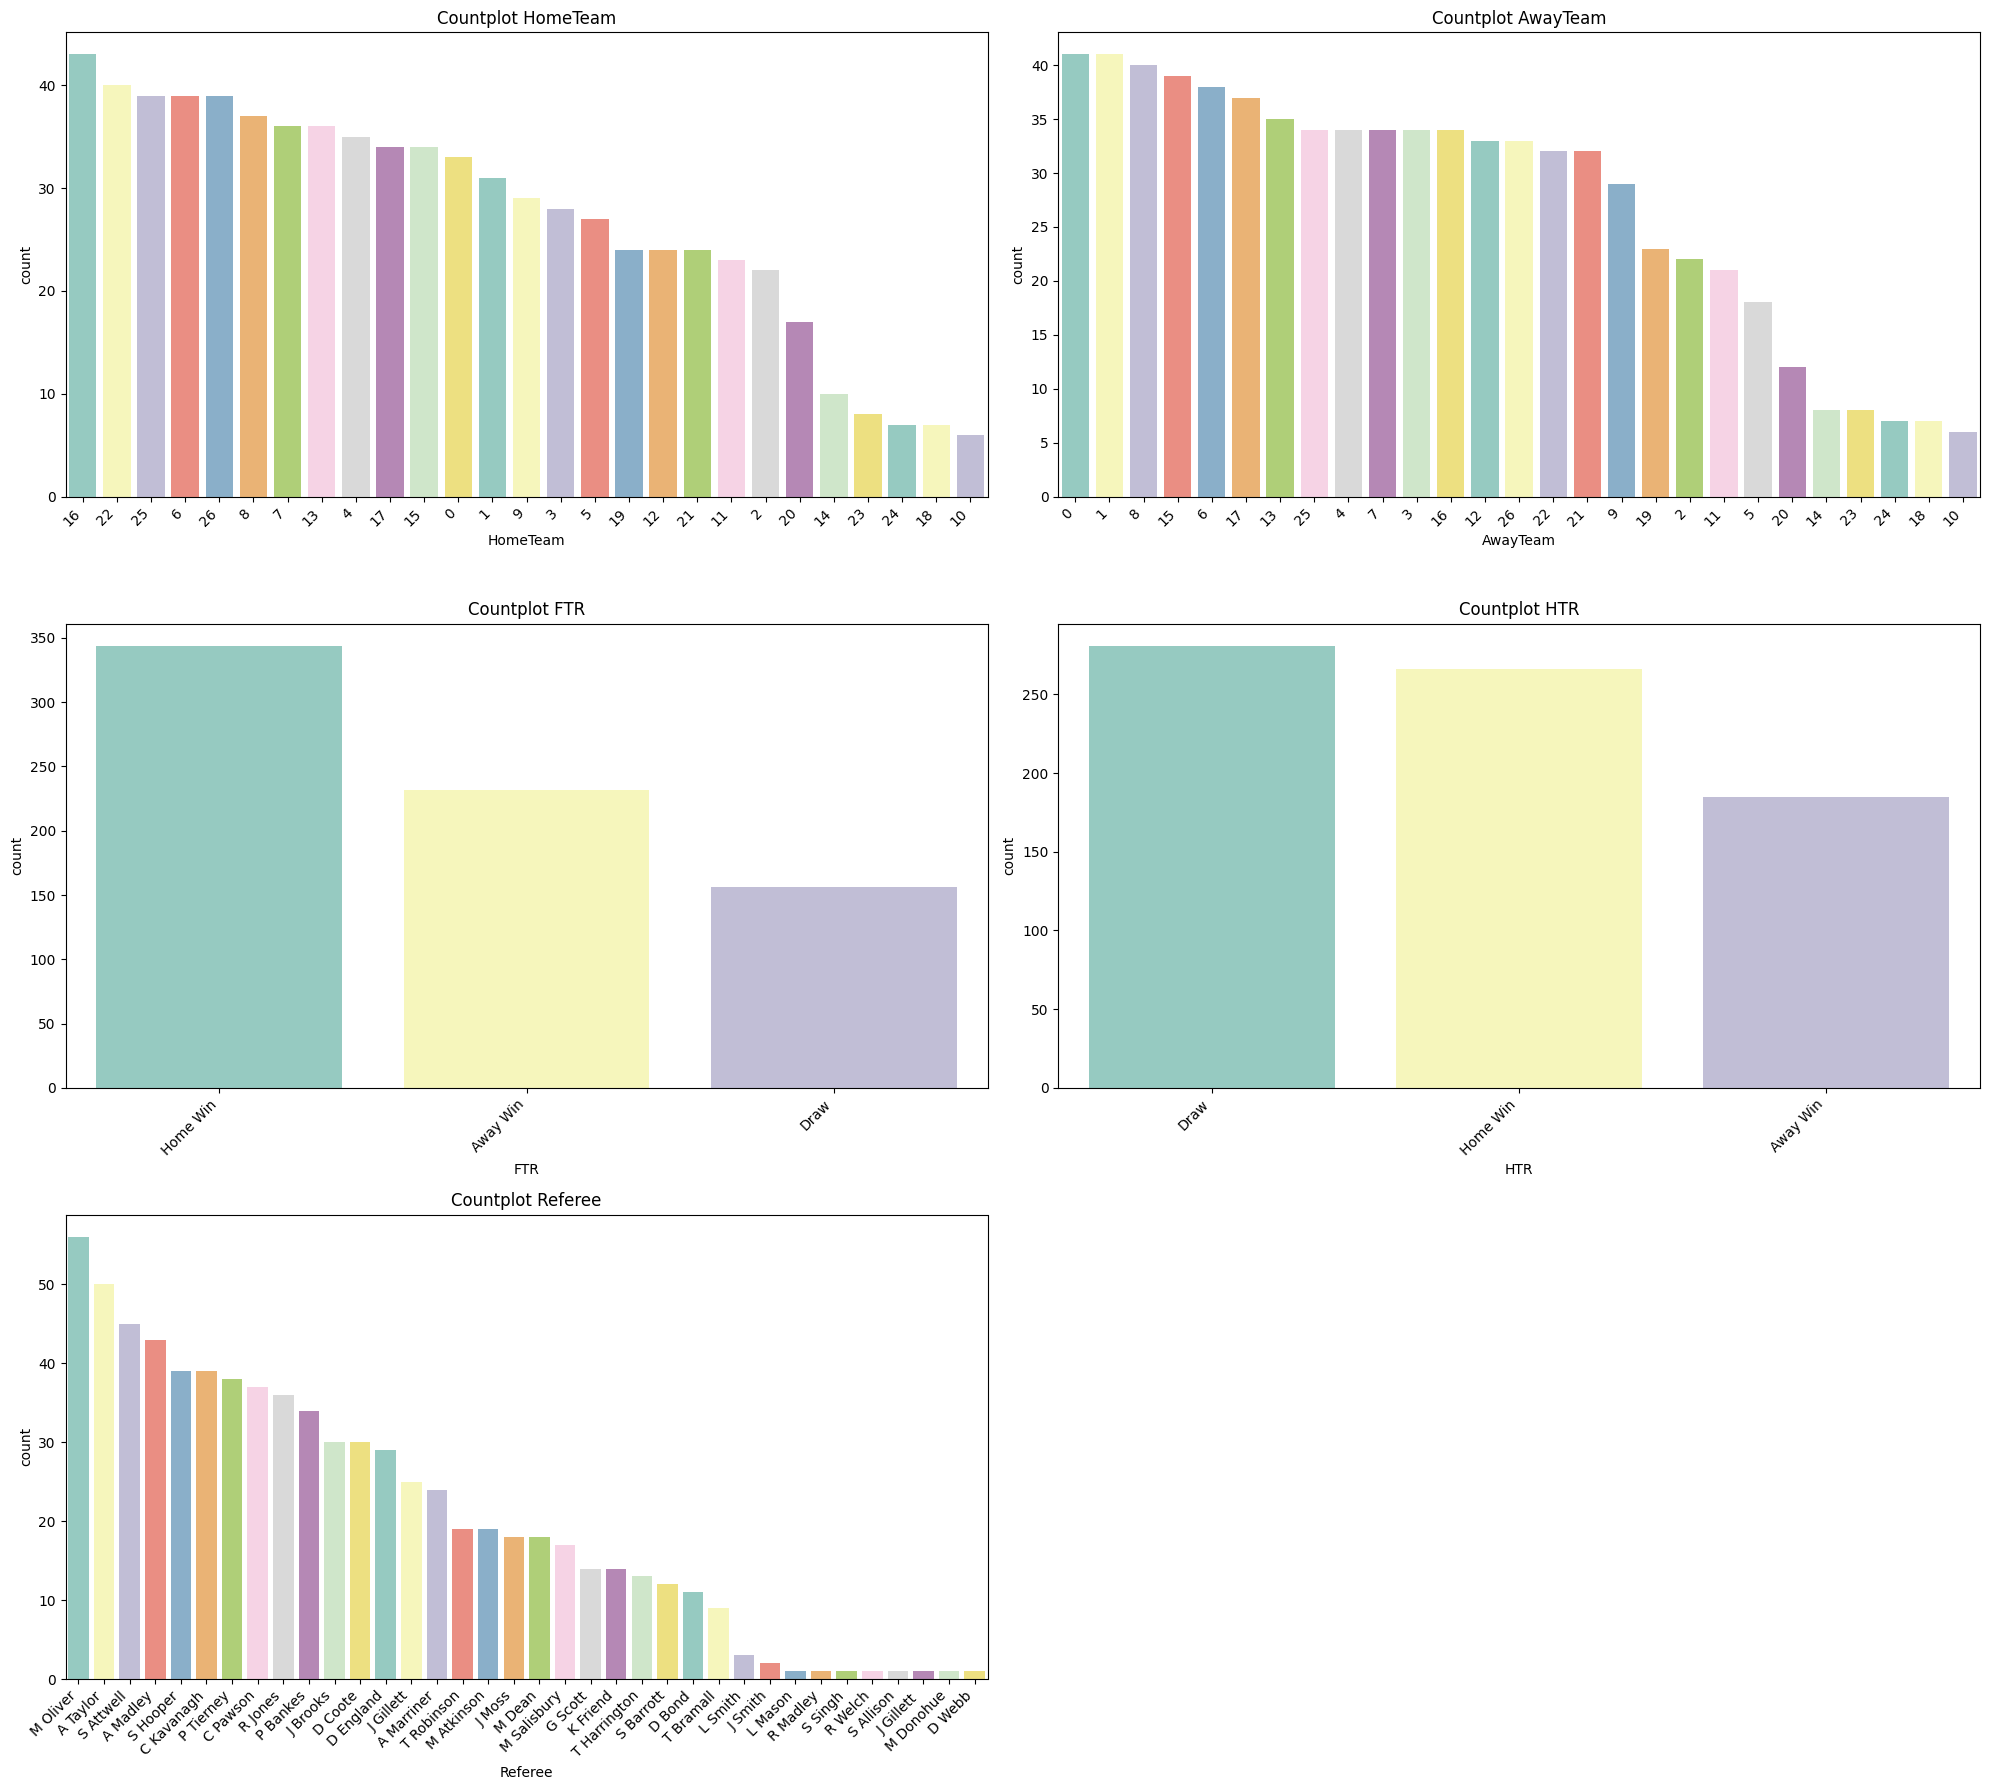

In [14]:
# Buat salinan data dengan label asli
decoded_df = match_data.copy()
decoded_df['HomeTeam'] = team_encoder.inverse_transform(match_data['HomeTeam'])
decoded_df['AwayTeam'] = team_encoder.inverse_transform(match_data['AwayTeam'])
# Decode kembali untuk visualisasi
decoded_df = match_data.copy()
decoded_df['Referee'] = ref_encoder.inverse_transform(match_data['Referee'])

# Mapping balik untuk hasil pertandingan
reverse_result_mapping = {0: 'Home Win', 1: 'Draw', 2: 'Away Win'}
decoded_df['FTR'] = match_data['FTR'].map(reverse_result_mapping)
decoded_df['HTR'] = match_data['HTR'].map(reverse_result_mapping)

# Visualisasi countplot untuk semua variabel kategorikal dengan label asli
categorical_cols = ['HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'Referee']

plt.figure(figsize=(20, 18))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=decoded_df, x=col, order=decoded_df[col].value_counts().index, palette="Set3")
    plt.title(f'Countplot {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

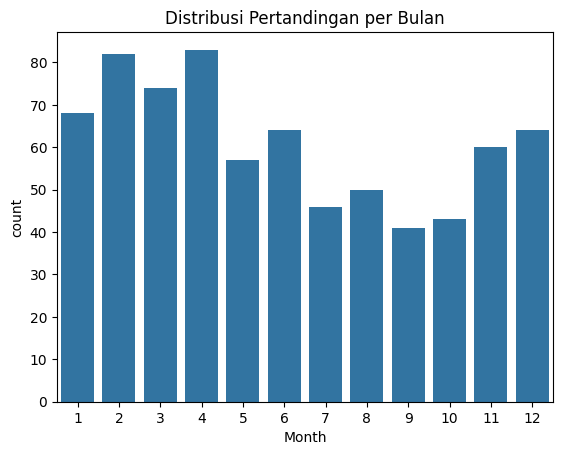

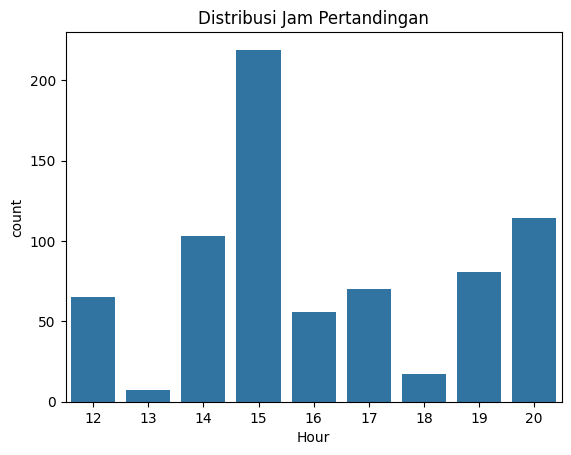

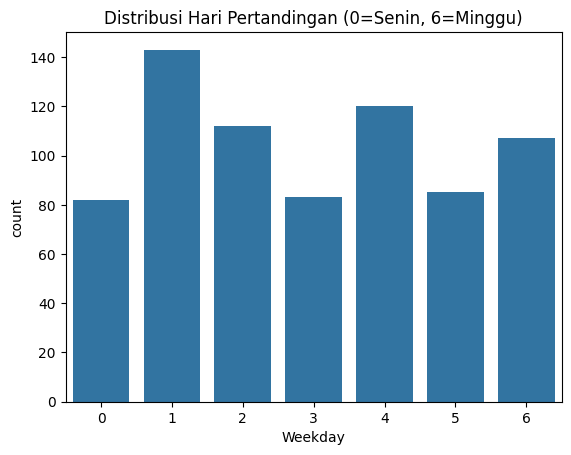

In [15]:
sns.countplot(x='Month', data=match_data)
plt.title('Distribusi Pertandingan per Bulan')
plt.show()

sns.countplot(x='Hour', data=match_data)
plt.title('Distribusi Jam Pertandingan')
plt.show()

sns.countplot(x='Weekday', data=match_data)
plt.title('Distribusi Hari Pertandingan (0=Senin, 6=Minggu)')
plt.show()


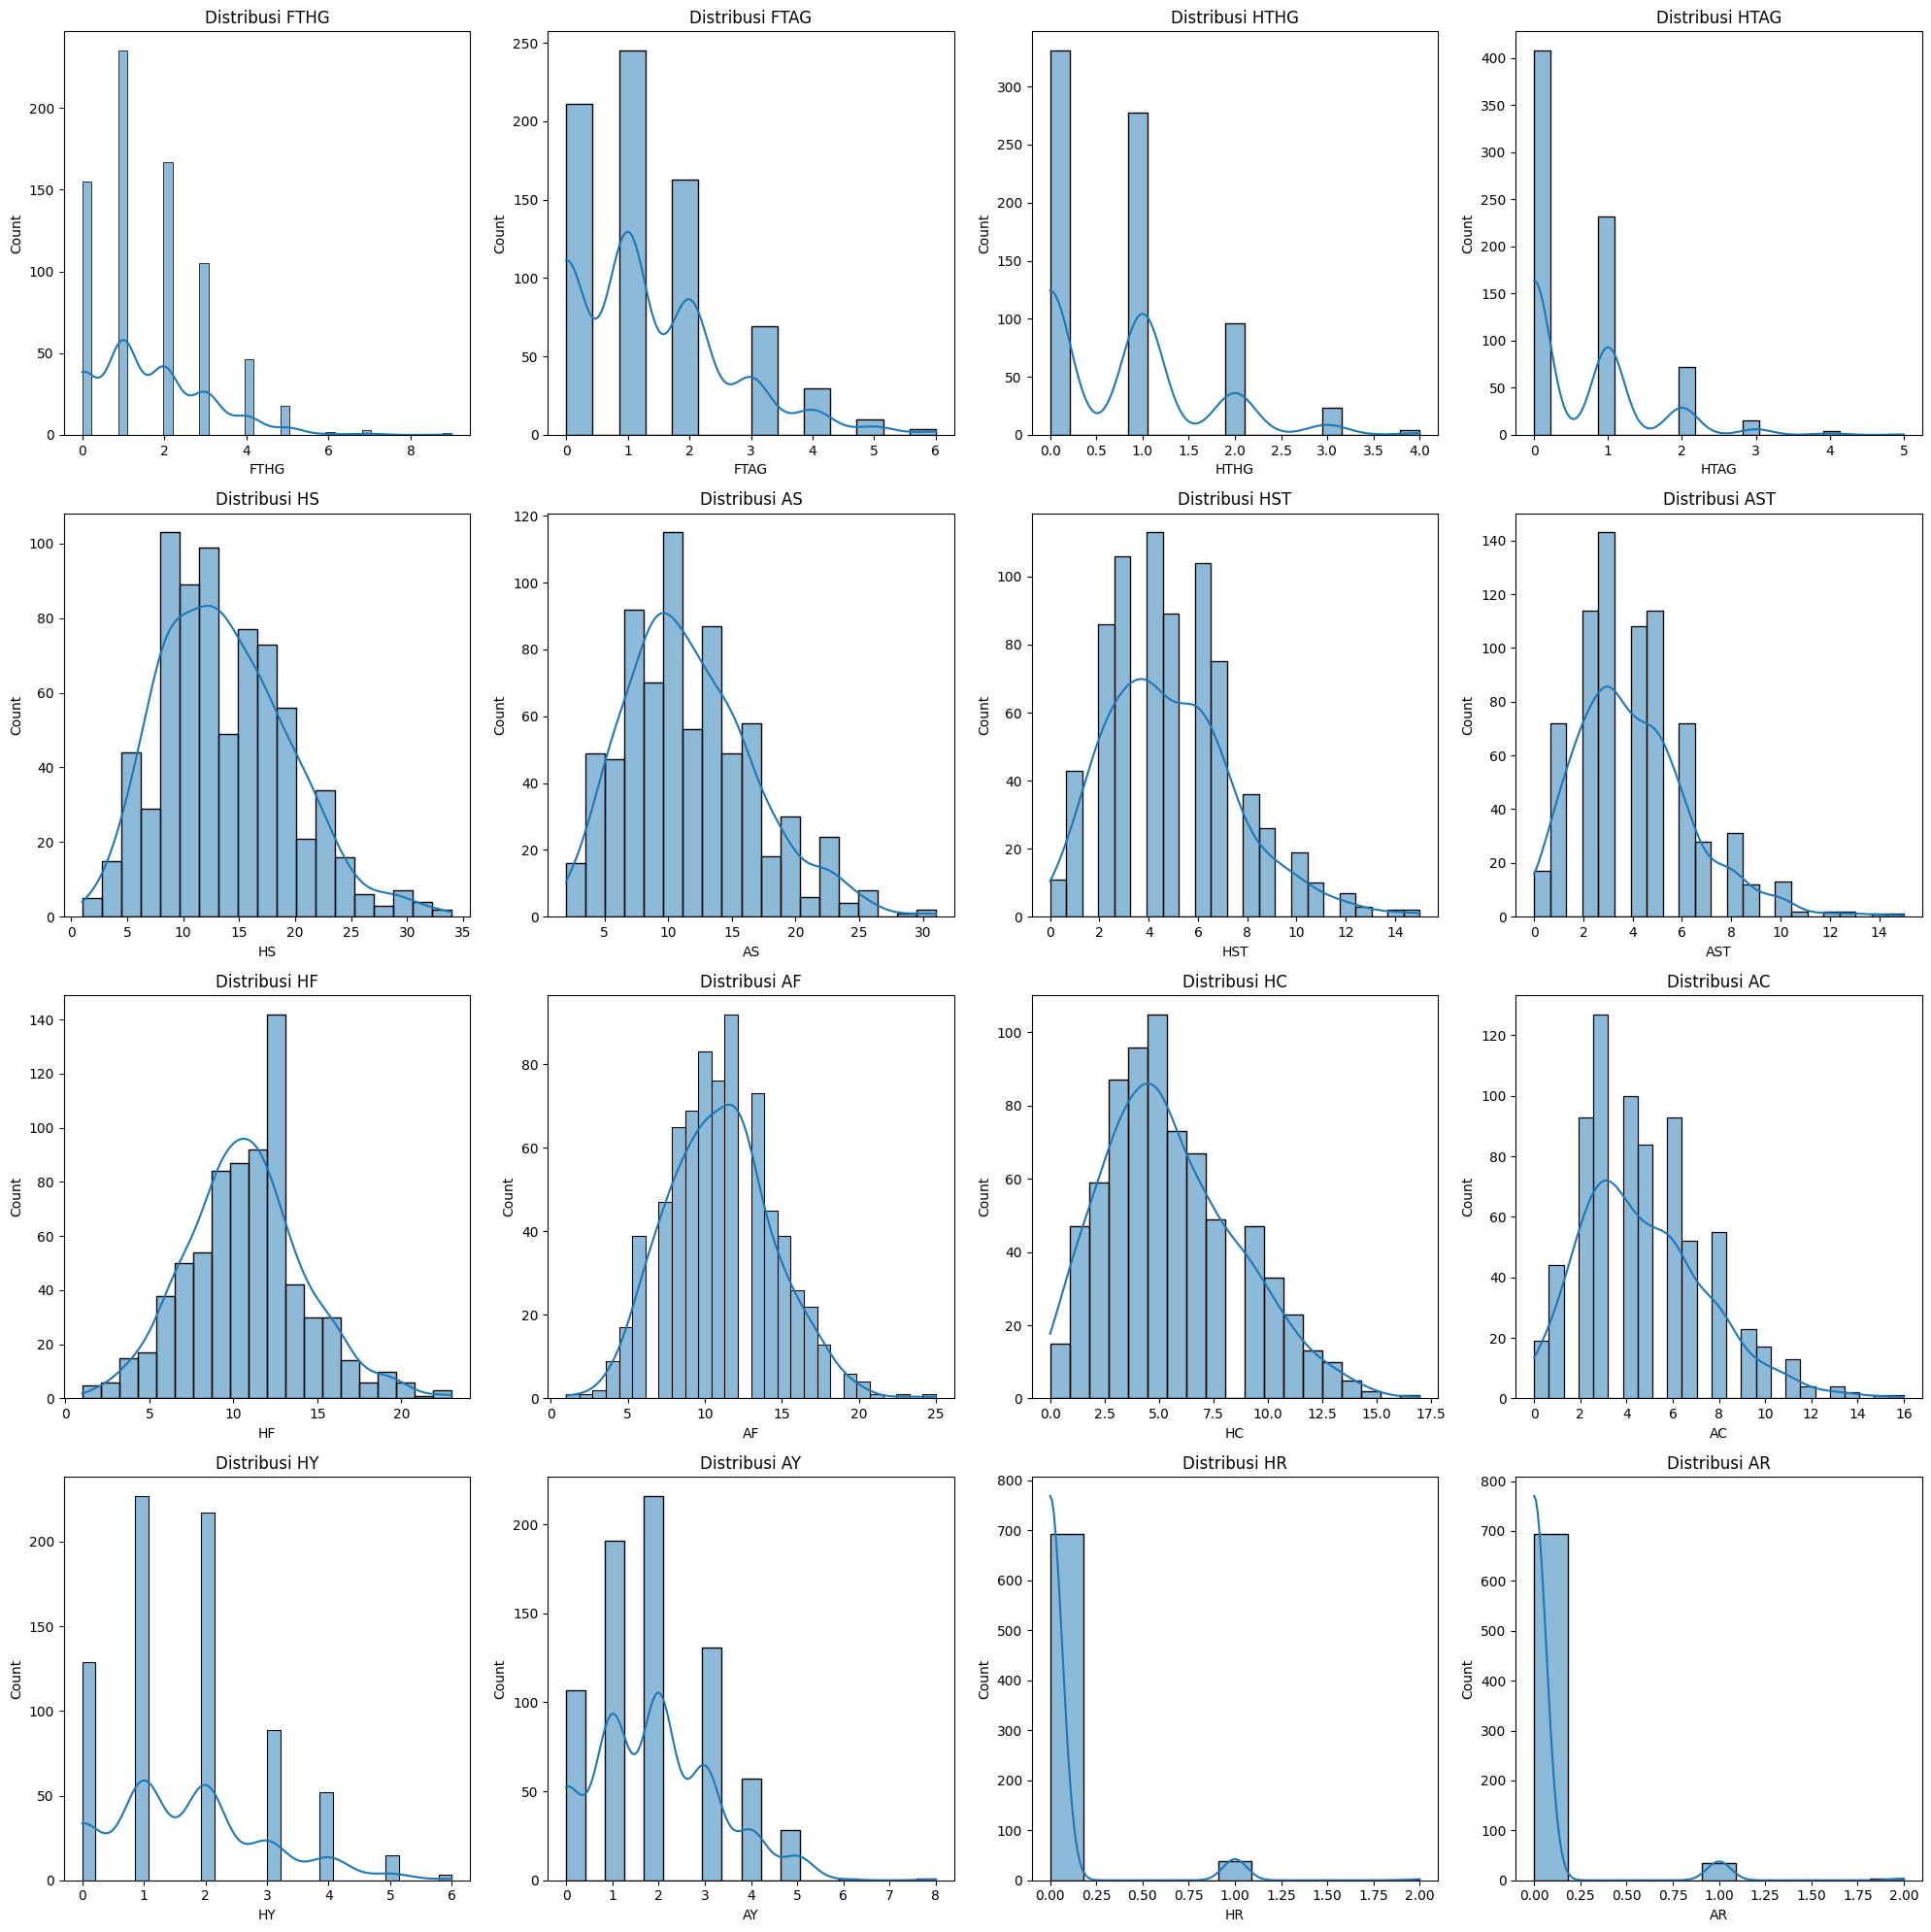

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST',
                  'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']

plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(match_data[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


#### 5. Multivariate Analysis
- Melihat hubungan antar fitur
- Contoh: korelasi gol vs hasil, jumlah tembakan vs kemenangan
- Visualisasi: heatmap, scatterplot

##### 1. Korelasi antar variabel numerik

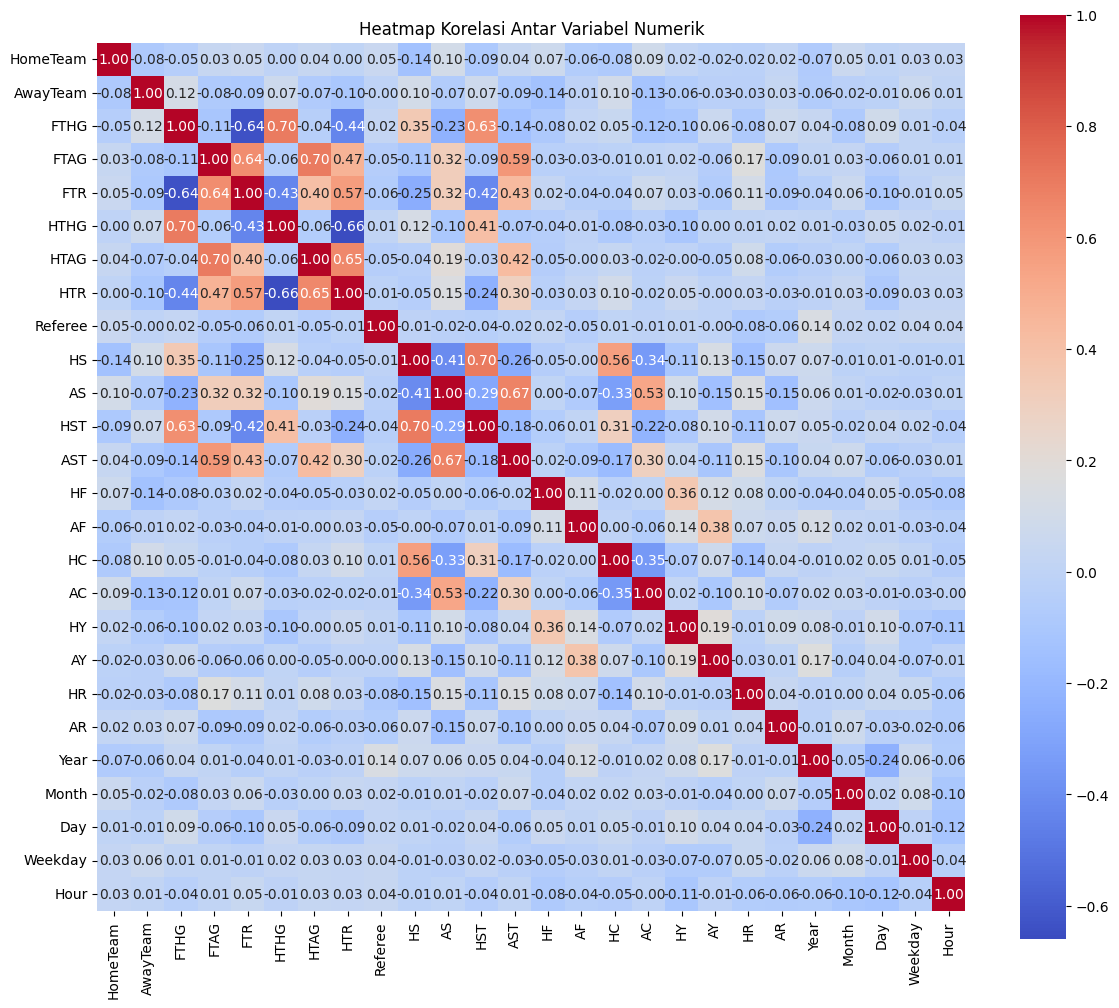

In [18]:
# Pilih hanya kolom numerik
numeric_cols = match_data.select_dtypes(include=['int64', 'float64']).columns

# Hitung korelasi
corr_matrix = match_data[numeric_cols].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

##### 2. Hubungan antara hasil pertandingan (FTR) dan fitur lain

**Boxplot: Variabel Numerik terhadap Target (FTR)**

Visualisasi boxplot untuk melihat distribusi setiap fitur numerik terhadap hasil pertandingan (FTR). Target dikodekan sebagai:
- 0 = Home Win
- 1 = Draw
- 2 = Away Win

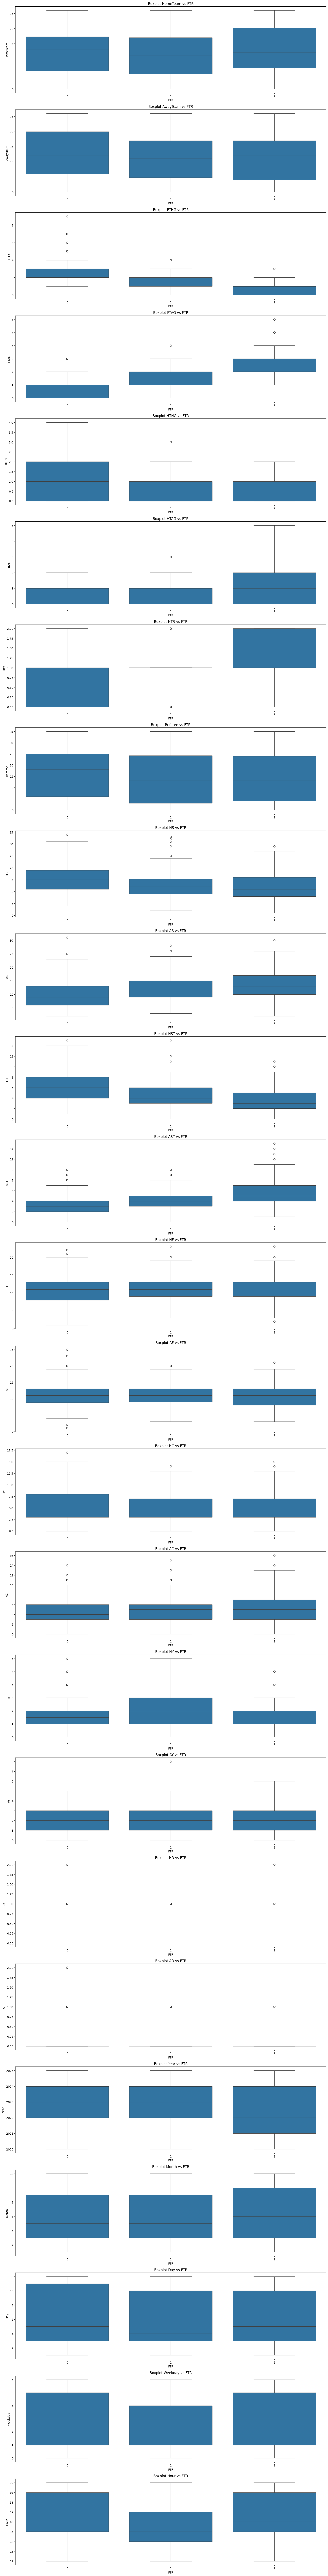

In [21]:
# Ambil semua kolom numerik kecuali FTR (target)
numeric_features = match_data.select_dtypes(include=['int64', 'float64']).columns
numeric_features = numeric_features.drop('FTR')

# Plot boxplot untuk masing-masing fitur numerik terhadap FTR
plt.figure(figsize=(16, 5 * len(numeric_features)))
for i, col in enumerate(numeric_features):
    plt.subplot(len(numeric_features), 1, i + 1)
    sns.boxplot(x='FTR', y=col, data=match_data)
    plt.title(f'Boxplot {col} vs FTR')
    plt.tight_layout()

Scatterplot digunakan untuk melihat hubungan antar kombinasi fitur numerik. Untuk visualisasi ini, akan digunakan `pairplot` dari seaborn.

c:\Users\faish\anaconda3\envs\mlTerapan\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


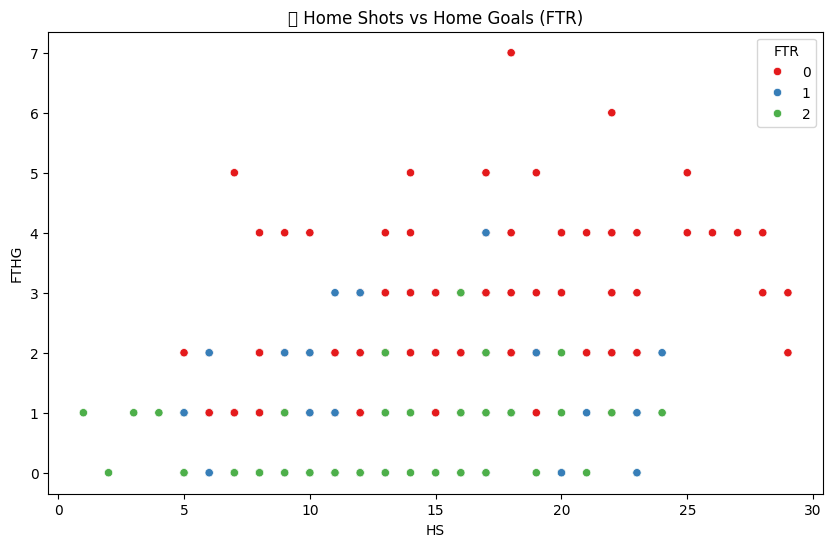

c:\Users\faish\anaconda3\envs\mlTerapan\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


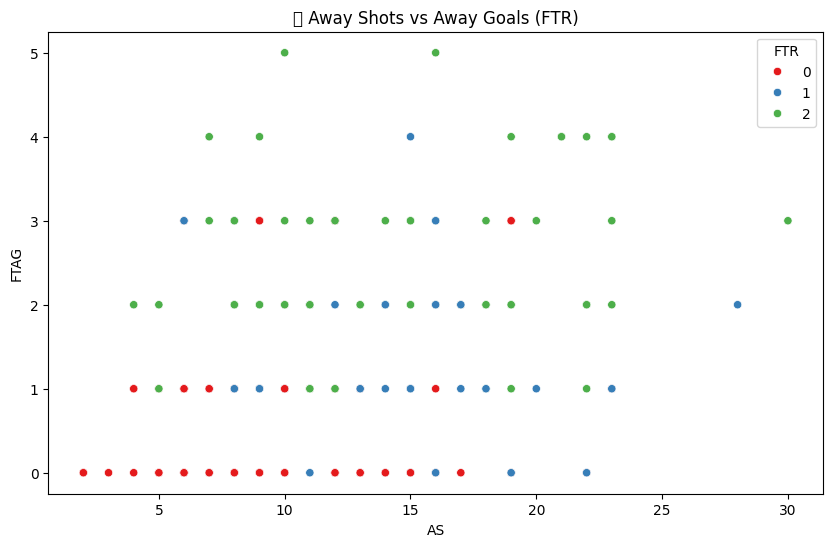

c:\Users\faish\anaconda3\envs\mlTerapan\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128299 (\N{PISTOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


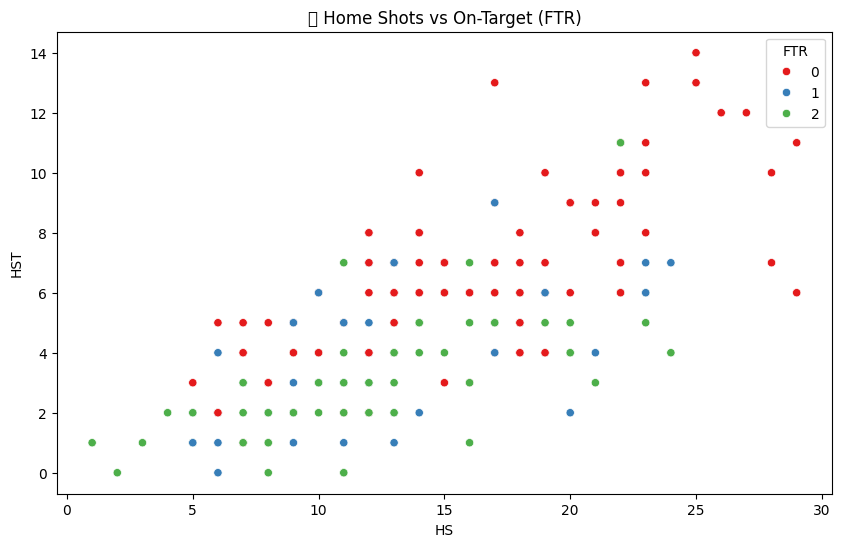

c:\Users\faish\anaconda3\envs\mlTerapan\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128299 (\N{PISTOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


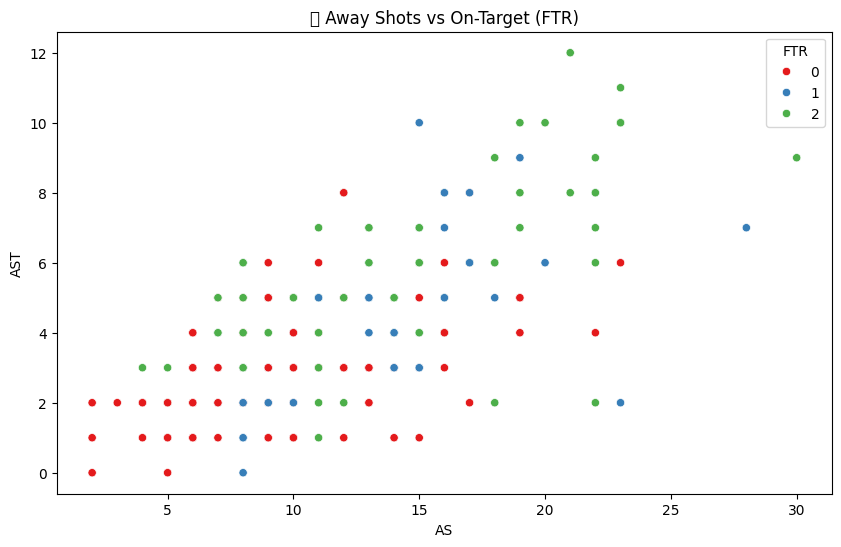

c:\Users\faish\anaconda3\envs\mlTerapan\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129000 (\N{LARGE YELLOW SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


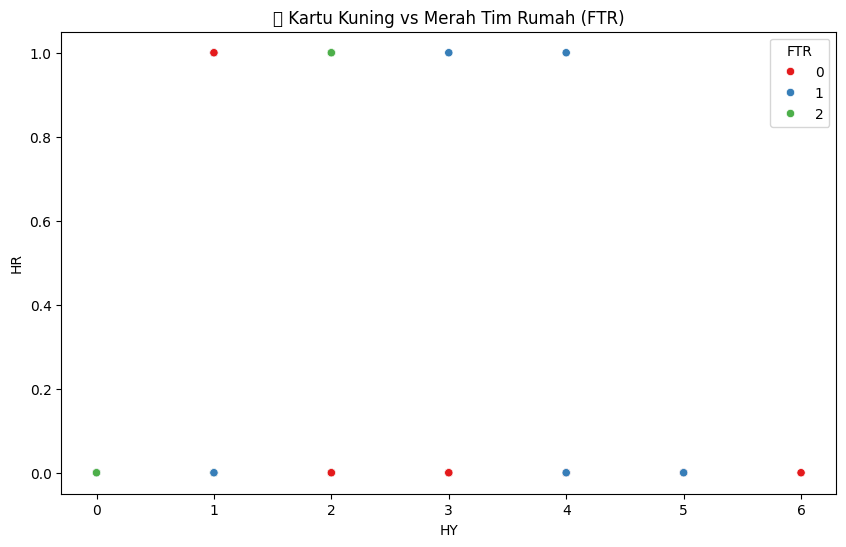

c:\Users\faish\anaconda3\envs\mlTerapan\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


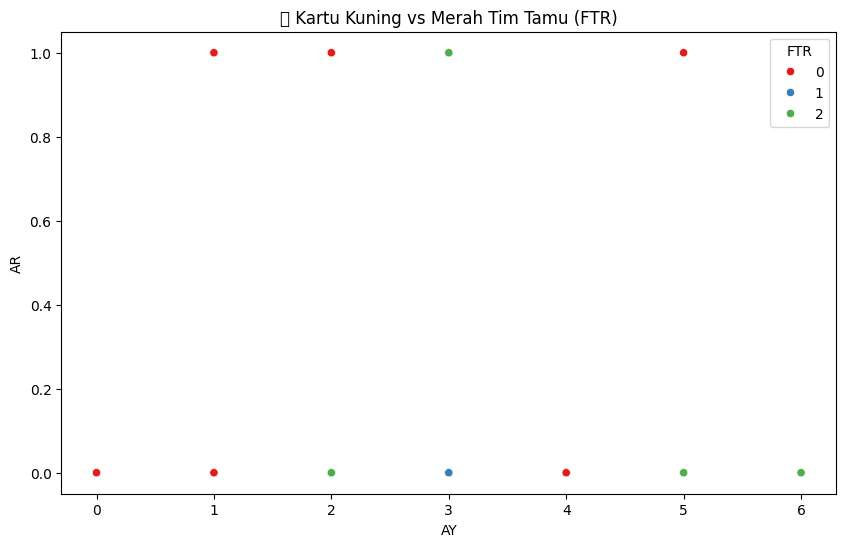

c:\Users\faish\anaconda3\envs\mlTerapan\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


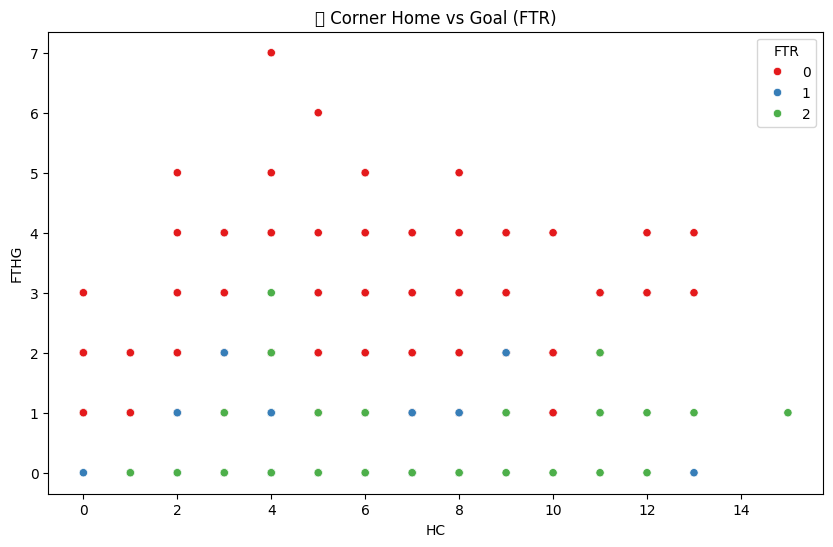

c:\Users\faish\anaconda3\envs\mlTerapan\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


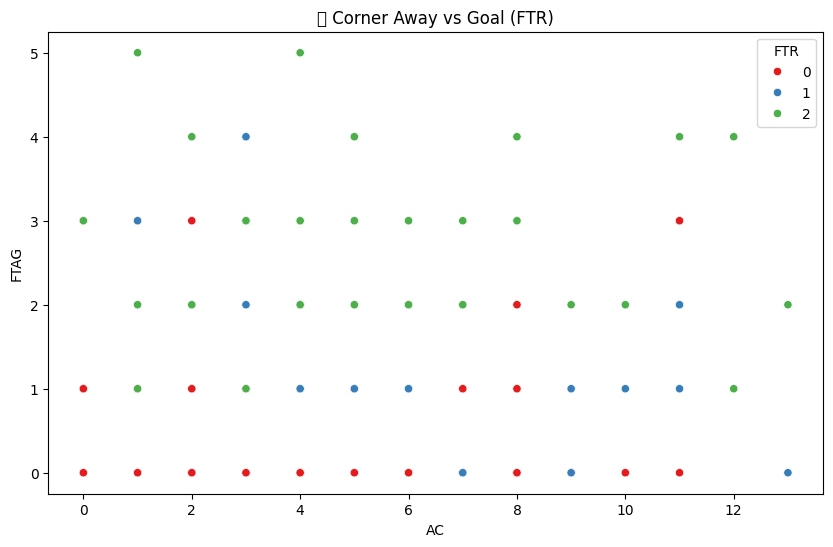

In [ ]:
# Pairplot antar semua fitur numerik
# (gunakan sample agar tidak terlalu berat jika datanya besar)
sampled_data = match_data.sample(frac=0.3, random_state=42)  # Sampling 30% data
sns.pairplot(sampled_data[numeric_features.to_list() + ['FTR']], hue='FTR', palette='Set1', corner=True)
plt.suptitle('Scatterplot Kombinasi Fitur Numerik', y=1.02)
plt.show()

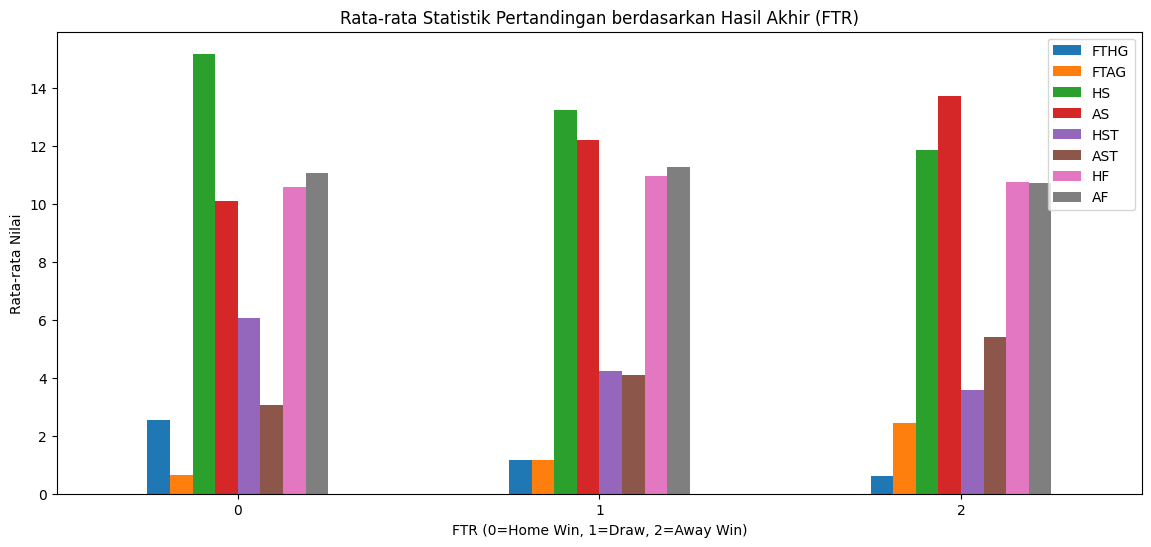

In [20]:
# Perbandingan rata-rata statistik berdasarkan hasil pertandingan
grouped_stats = match_data.groupby('FTR')[['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF']].mean()
grouped_stats.plot(kind='bar', figsize=(14, 6))
plt.title('Rata-rata Statistik Pertandingan berdasarkan Hasil Akhir (FTR)')
plt.xlabel('FTR (0=Home Win, 1=Draw, 2=Away Win)')
plt.ylabel('Rata-rata Nilai')
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.show()


# Data Perparation

Persiapan data untuk melakukan pelatihan

## Persiapan Data

cek jenis data

In [26]:
print(match_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 732 entries, 0 to 1879
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Div               732 non-null    object
 1   HomeTeam          732 non-null    int64 
 2   AwayTeam          732 non-null    int64 
 3   FTHG              732 non-null    int64 
 4   FTAG              732 non-null    int64 
 5   FTR               732 non-null    int64 
 6   HTHG              732 non-null    int64 
 7   HTAG              732 non-null    int64 
 8   HTR               732 non-null    int64 
 9   Referee           732 non-null    int64 
 10  HS                732 non-null    int64 
 11  AS                732 non-null    int64 
 12  HST               732 non-null    int64 
 13  AST               732 non-null    int64 
 14  HF                732 non-null    int64 
 15  AF                732 non-null    int64 
 16  HC                732 non-null    int64 
 17  AC                73

Data sudah menggunakan numerik untuk dilakukan proses. Serta tidak ada data yang null.Selanjutnya, dilakukan Split data untuk dilanjutkan ke tahap berikut nya

#### Split Data

Setelah melakukan FE dilakuan Split data dengan perbanding 90:10

In [30]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target, hapus 'FTR', 'Div', dan 'Referee_original' dari fitur
X = match_data.drop(columns=['FTR', 'Div', 'Referee_original'])  # fitur
y = match_data['FTR']                                            # target

# Lakukan pembagian 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tampilkan bentuk data
print("Ukuran data train:", X_train.shape)
print("Ukuran data test:", X_test.shape)
print("\nKolom yang digunakan sebagai fitur (X):")
print(X_train.columns)

Ukuran data train: (585, 25)
Ukuran data test: (147, 25)

Kolom yang digunakan sebagai fitur (X):
Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR',
       'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'Year', 'Month', 'Day', 'Weekday', 'Hour'],
      dtype='object')


Standarisasi

In [31]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Data Modeling

Import Library yang dibutuhkan untuk melakukan training

In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from IPython.display import display, HTML
from xgboost import XGBClassifier

Lakukan Cross Validation yang akan digunkan untuk GridSearch Hyperparameter Model

In [37]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [38]:
#Cek Variabel target
y_train

1240    2
1368    0
446     1
524     1
1406    0
       ..
1251    0
211     2
1359    0
568     0
1273    2
Name: FTR, Length: 585, dtype: int64

## Pemodelan dan Pemilihan Model

Proses pemodelan dilakukan menggunakan empat algoritma supervised learning, yaitu **Random Forest**, **Logistic Regression**, **Support Vector Machine (SVM)**, dan **XGBoost**. Keempat model ini dipilih berdasarkan kombinasi antara kekuatan generalisasi, kemudahan interpretasi, dan performa yang telah terbukti pada permasalahan klasifikasi serupa dalam domain prediksi pertandingan dan olahraga.

### Alasan Pemilihan Model

1. **Random Forest**  
   Random Forest merupakan model ansambel berbasis pohon keputusan yang secara alami mampu menangani data kategorikal maupun numerik. Model ini juga tangguh terhadap overfitting dan mampu menangani dataset dengan fitur yang saling berkorelasi. Untuk tugas prediksi hasil pertandingan yang mungkin melibatkan banyak fitur seperti statistik tim, performa sebelumnya, atau kondisi pertandingan, Random Forest menjadi pilihan yang stabil dan cukup interpretatif.

2. **Logistic Regression**  
   Logistic Regression digunakan sebagai baseline karena sifatnya yang sederhana dan mudah diinterpretasikan. Meskipun model ini linear, Logistic Regression masih mampu memberikan performa yang baik terutama jika fitur-fitur yang digunakan telah melalui proses seleksi dan normalisasi yang baik. Untuk kasus multikelas, model ini secara default menggunakan pendekatan One-vs-Rest (OvR).

3. **Support Vector Machine (SVM)**  
   SVM sangat efektif dalam ruang berdimensi tinggi dan mampu memisahkan kelas-kelas yang tidak linear dengan menggunakan kernel trick. SVM dipilih karena kemampuannya menangkap batas-batas keputusan yang kompleks, yang mungkin muncul dalam data pertandingan yang dinamis. Selain itu, SVM cenderung bekerja baik pada dataset dengan jumlah fitur yang besar dan data yang tidak seimbang.

4. **XGBoost**  
   XGBoost merupakan algoritma boosting yang sangat populer karena kecepatan dan performanya yang tinggi dalam berbagai kompetisi dan studi klasifikasi. Model ini mampu menangkap interaksi non-linear antar fitur secara lebih efisien dan sering kali mengungguli model-model lainnya pada data tabular yang kompleks, seperti pada data pertandingan yang melibatkan banyak variabel dengan tingkat pengaruh yang bervariasi.

### Langkah Pemodelan

1. **Inisialisasi Model:** Setiap algoritma diinisialisasi dengan parameter dasar dan `random_state` untuk memastikan hasil yang dapat direproduksi.

2. **Penentuan Hyperparameter Grid:** Untuk masing-masing model, disusun kombinasi hyperparameter yang akan diuji menggunakan Grid Search. Rentang nilai dipilih berdasarkan praktik umum yang telah terbukti efektif.

3. **Grid Search dengan Cross Validation:** Grid Search dilakukan dengan teknik K-Fold Cross Validation untuk menemukan kombinasi hyperparameter terbaik.

4. **Evaluasi dengan Skor f1_macro:** Digunakan metrik `f1_macro` karena prediksi hasil pertandingan merupakan masalah klasifikasi multikelas (menang, kalah, draw), sehingga diperlukan metrik yang menyeimbangkan performa pada semua kelas.

5. **Seleksi Model Terbaik:** Model dengan skor validasi tertinggi dan konfigurasi hyperparameter terbaik akan dipilih untuk tahap prediksi akhir.

Dengan pemilihan model dan proses tuning yang tepat, diharapkan sistem mampu memprediksi hasil pertandingan secara akurat dan seimbang.


In [57]:
# --- TENTUKAN HYPERPARAMETER GRID UNTUK SETIAP MODEL ---
# 1. Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],         # Jumlah pohon
    'max_depth': [10, 20, None],        # Kedalaman maksimum
    'min_samples_leaf': [1, 2]          # Jumlah minimum sampel di daun
}

# 2. Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

# 3. Support Vector Machine (SVM)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}

# 4. XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# --- DAFTAR MODEL YANG AKAN DI-TUNING (UPDATED) ---
models_to_tune = [
    ('Random Forest', RandomForestClassifier(random_state=42), param_grid_rf),
    ('Logistic Regression', LogisticRegression(random_state=42, max_iter=2000), param_grid_lr),
    ('SVM', SVC(random_state=42, probability=True), param_grid_svm),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), param_grid_xgb)
]

# --- LOOP UTAMA UNTUK TUNING DAN DISPLAY ---
all_results = []

for name, estimator, param_grid in models_to_tune:
    display(HTML(f'<h2>--- Memulai Tuning untuk: {name} ---</h2>'))
    
    grid_search = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=cv_strategy, # Pastikan cv_strategy sudah didefinisikan
        scoring='f1_macro',
        n_jobs=-1
    )
    
    # Lakukan fitting
    grid_search.fit(X_train, y_train)
    
    # Tampilkan objek grid_search yang sudah di-fit
    display(grid_search)
    
    # Tampilkan estimator terbaik secara terpisah
    display(HTML(f'<h3>Estimator Terbaik untuk {name}:</h3>'))
    display(grid_search.best_estimator_)
    
    # Tambahkan garis pemisah
    display(HTML("<hr>"))
    
    # Simpan info untuk ringkasan akhir
    all_results.append({
        'Model': name,
        'Best Score': grid_search.best_score_,
        'Best Params': grid_search.best_params_,
        'Best Estimator': grid_search.best_estimator_
    })

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 2], 'n_estimators': [100, 200]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


,n_estimators,100
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'penalty': ['l2'], 'solver': ['liblinear', 'lbfgs']}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


,estimator,SVC(probabili...ndom_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'kernel': ['rbf', 'linear']}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


,C,0.1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


c:\Users\faish\anaconda3\envs\mlTerapan\lib\site-packages\xgboost\training.py:183: UserWarning: [09:05:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.05, 0.1], 'max_depth': [3, 5], 'n_estimators': [100, 200]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'multi:softprob'


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [58]:
# --- RINGKASAN AKHIR ---
print("\n\n--- Ringkasan Performa Model Setelah Tuning ---")
summary_df = pd.DataFrame(all_results)[['Model', 'Best Score']]
summary_df = summary_df.sort_values(by='Best Score', ascending=False).reset_index(drop=True)
print(summary_df)



--- Ringkasan Performa Model Setelah Tuning ---
                 Model  Best Score
0  Logistic Regression    1.000000
1                  SVM    1.000000
2              XGBoost    0.987670
3        Random Forest    0.959856


#### Perbandingan Model

Dilakukan perbandingan model dengan berbagai macam indikator

In [62]:
# Tambahkan fungsi yang hilang di baris import ini
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Asumsikan 'all_results', 'X_test', dan 'y_test' sudah tersedia

print("="*60)
print("       HASIL EVALUASI MODEL PADA DATA TES")
print("="*60)

# Loop melalui setiap hasil model yang sudah di-tuning
for result in all_results:
    name = result['Model']
    best_params = result['Best Params']
    model = result['Best Estimator']

    # Lakukan prediksi pada data tes
    y_pred = model.predict(X_test)
    
    # Cetak hasil evaluasi
    print(f"\n--- {name} ---")
    print("Parameter Terbaik :", best_params)
    
    # Hitung dan cetak metrik performa
    print(f"Akurasi           : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Presisi (micro)   : {precision_score(y_test, y_pred, average='micro'):.4f}")
    print(f"Recall (micro)    : {recall_score(y_test, y_pred, average='micro'):.4f}")
    print(f"F1-score (micro)  : {f1_score(y_test, y_pred, average='micro'):.4f}")
    
    print("-" * 25)

       HASIL EVALUASI MODEL PADA DATA TES

--- Random Forest ---
Parameter Terbaik : {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}
Akurasi           : 0.9796
Presisi (micro)   : 0.9796
Recall (micro)    : 0.9796
F1-score (micro)  : 0.9796
-------------------------

--- Logistic Regression ---
Parameter Terbaik : {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Akurasi           : 1.0000
Presisi (micro)   : 1.0000
Recall (micro)    : 1.0000
F1-score (micro)  : 1.0000
-------------------------

--- SVM ---
Parameter Terbaik : {'C': 0.1, 'kernel': 'linear'}
Akurasi           : 1.0000
Presisi (micro)   : 1.0000
Recall (micro)    : 1.0000
F1-score (micro)  : 1.0000
-------------------------

--- XGBoost ---
Parameter Terbaik : {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Akurasi           : 1.0000
Presisi (micro)   : 1.0000
Recall (micro)    : 1.0000
F1-score (micro)  : 1.0000
-------------------------
